In [37]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will learn about an approach that tries to approach the integer hull of a polyhedron by iteratively introducing additional inequalities, cutting away fractional solutions.

Consider a rational IP $max\{c^Tx|x  \in P \cap Z^n\}$, and $c\in Z^n$, $\delta \in Q$ such that $P\subseteq \{x|c^Tx\leq \delta\}$.
<br><br>
Then we can write the integer hull as $P_I \subseteq \{x|c^Tx\leq\lfloor\delta\rfloor\}$.
<br><br>
These inequality $c^Tx\leq\lfloor\delta\rfloor$ is called <b>Chvatal-Gomory inequality</b>.
<br><br>
We can use this inequality to define the <b>elementary closure</b> of $P$ by
<br><br>
$P^1:=\{x|c^Tx\leq\lfloor\delta\rfloor\forall c\in Z^n,\delta\in Q: P\subseteq\{x|c^Tx\leq\delta\} and P\cap\{x|c^Tx=\delta\}\neq\emptyset\}$
<br><br>
Iteratively applying this closure to the original polyhedron $P$ yields the <b>Chvatal-Gomory closure</b> $P^t$ of rank t.

Two important results of these closures are:
1. If $P$ is a non-empty polyhedron $P(A,b)\neq\emptyset$ induced by a TDI system $Ax\leq b$ and A is integral $A \in Z^{m \times n}$<br>
$\Rightarrow$ The elementary closure $P^1$ of $P$ is also a polyhedron $P^1 = P(A, \lfloor b \rfloor)$
2. For each rational polyhedron $P$ there $\exists t \in Z_{\geq 0}: P^t = P_I$

So we can eventually reach the integer hull of a polyhedron by iteratively getting its elementary closure!

# Fractional Gomory Cuts

Now let's see how we can use the above results in action.
<br><br>
Consider a rational IP $max\{c^Tx|Ax=b, x\geq 0, x\in Z^n\}$.
Note that we can always observe $Ax=b$ from $Ax\leq b$ by adding slack variables.
<br><br>
For example:

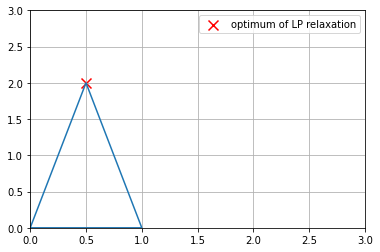

In [38]:
c = np.matrix('0; 1') # Maximizing x_2
A = np.matrix('4 1; -4 1; -1 0; 0 -1')
b = np.matrix('4 0 0')
plt.figure()
plt.plot([0.0, 0.5, 1.0, 0.0], [0.0, 2.0, 0.0, 0.0])
plt.scatter(0.5, 2.0, marker='x', color='red', s=100, label='optimum of LP relaxation')
plt.xlim((0, 3))
plt.ylim((0, 3))
plt.grid()
plt.legend()
plt.show()

Now, given our optimal solution $x^*=(0.5, 2)^T$ of the LP relaxation of the IP, we can introduce an additional inequality to cut it, if it is fractional.
<br><br>
Let $x$ be any feasible solution of the LP relaxation. Using the optimal basis $B$, we can write it as
<br><br>
$x_B = \bar b - \bar{A}_{\bullet N} x_N:=A^{-1}_{\bullet B}A_{\bullet N}x_N$
<br><br>
It follows for any index $i$ of the solution that is not integral ($(x^*_B)_i\notin Z$), that
<br><br>
$(x_B)_i = \bar b_i - \sum_{j\in N} \bar A_{ij} \leq \bar b_i - \sum_{j \in N} \lfloor\bar A_{ij}\rfloor x_j$
<br><br>
For any integer solution $x\in Z^n$ we can introduce <b>fractional Gormory cuts</b> that they are not violating, but $x^*$ does:
<br><br>
$(x_B)_i \leq \lfloor \bar b_i \rfloor - \sum_{j \in N} \lfloor\bar A_{ij}\rfloor x_j$
<br><br>
Note: This cut can also be expressed by substracting it from the equation before, which yields
<br><br>
$\sum_{j\in N} f_{ij}x_j \geq f_i$
<br><br>
where $f_i = \bar b_i - \lfloor \bar b_i \rfloor$ and $f_{ij} = \bar A_{ij} - \lfloor \bar A_{ij} \rfloor $
<br><br>
Let's see an iteration of applying these cuts in action:

In [39]:
# First we need to add the slack variables, to get the form Ax=b (x>=0)
A = np.matrix('4 1 1 0; -4 1 0 1')
b = np.matrix('4; 0')

# Optimal basis
B = [0, 1]
N = [2, 3]

# Optimal solution
x_opt = np.linalg.inv(A[:, B])@b

So, for the first index of our optimal solution:
<br><br>
$(x_B)_1 = x_1 = \bar b_1 - \sum_{j\in N} \bar A_{1j}x_j = \frac{1}{2} - \frac{1}{8}x_3 + \frac{1}{8}x_4$
<br><br>
We can get the cut from rounding down the coefficients:
<br><br>
$x_1 \leq \lfloor \frac{1}{2} \rfloor - \lfloor \frac{1}{8} \rfloor x_3 - \lfloor - \frac{1}{8} \rfloor x_4$
$\iff -3x_1 + x_2 \leq 0$
<br><br>
This equation cuts off the former optimal solution $x^*$:

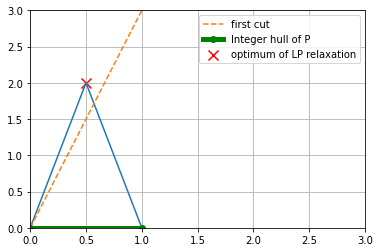

In [40]:
plt.figure()
plt.plot([0.0, 0.5, 1.0, 0.0], [0.0, 2.0, 0.0, 0.0])
plt.plot([0.0, 1.0], [0.0, 3.0], linestyle='dashed', label='first cut')
plt.plot([0.0, 1.0], [0.0, 0.0], linewidth=5, marker='o', color='green', label='Integer hull of P')
plt.scatter(0.5, 2.0, marker='x', color='red', s=100, label='optimum of LP relaxation')
plt.xlim((0, 3))
plt.ylim((0, 3))
plt.grid()
plt.legend()
plt.show()

Applying this cut iteratively to the resulting polyhedra would eventually result in the integer hull, which is just the axis of $x_1$ from 0 to 1 in our example.

# Gomory's Mixed-Integer Cuts

There is another form of cuts, that can achieve the desired result much faster.
<br><br>
The idea is to split the integral parts $f_i$ and $f_{ij}$ into two subsets $\{f_{ij}\leq f_i\}$ and $\{f_{ij} > f_i\}$.
<br><br>
The equality for integral indices of the optimal solution becomes:
<br><br>
$(x_B)_i = \bar b_i - \sum_{j\in N:f_{ij}\leq f_i} \bar A_{ij}x_j - \sum_{j\in N:f_{ij} > f_i} \bar A_{ij}x_j$
Then, the <b>Gomory mixed-integer cut</b> introduces
<br><br>
$\sum_{j\in N:f_{ij}\leq f_i} \frac{f_{ij}}{f_i}x_j + \sum_{j\in N:f_{ij}> f_i} \frac{1-f_{ij}}{1-f_i}x_j \geq 1$
<br><br>
Let's see what this does in our example:

The integral parts of 
<br><br>
$\frac{1}{2} - \frac{1}{8}x_3 + \frac{1}{8}x_4$
<br><br>
are
<br><br>
$f_1=\frac{1}{2}, f_{13}=\frac{1}{8}, f_{14}=\frac{7}{8}$
<br><br>
So the cut to introduce becomes
<br><br>
$\frac{\frac{1}{8}}{\frac{1}{2}}x_3 + \frac{1 - \frac{7}{8}}{1 - \frac{1}{2}}x_4 \geq 1$
$\iff x_2\leq 0$

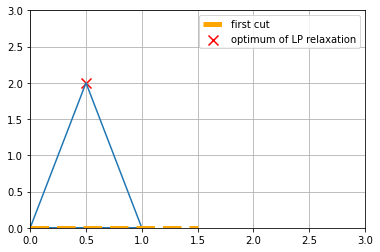

In [43]:
plt.figure()
plt.plot([0.0, 0.5, 1.0, 0.0], [0.0, 2.0, 0.0, 0.0])
plt.plot([0.0, 1.5], [0.0, 0.0], color='orange', linewidth=5, linestyle='dashed', label='first cut')
plt.scatter(0.5, 2.0, marker='x', color='red', s=100, label='optimum of LP relaxation')
plt.xlim((0, 3))
plt.ylim((0, 3))
plt.grid()
plt.legend()
plt.show()

With this cut we immediately got our integer hull $P_I$.